In [489]:
# Import Dependencies
from bs4 import BeautifulSoup as bs
import requests
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
pd.set_option('display.max_rows', 200)

In [490]:
converted_date = ""
raw_months = {"Jan": 1, "Feb": 2, "Mar" : 3, "Apr" : 4, 
              "May" : 5, "Jun" : 6, "Jul" : 7, "Aug" : 8,
              "Sep" : 9, "Oct" : 10, "Nov" : 11, "Dec" : 12}

# Convert Date from Jan 1, 1999 format to datetime object
def convertDate(raw_date):
    
    converted_date = ""
    
    temp_date = raw_date.split(" ")
    
    number_month = raw_months.get(temp_date[0])
    
    date_str = (str(number_month) + "/" + temp_date[1] + "/" + temp_date[2]).replace(",", "")
    
    converted_date = datetime.strptime(date_str, '%m/%d/%Y')
    
    return converted_date

In [491]:
input_name = input("Enter Youtuber's Name: ")

list_name = input_name.split()

converted_name = input_name

if len(list_name) > 1:
    
    converted_name = ""
    
    for i in range(len(list_name)):

        converted_name = converted_name + list_name[i]
        
        if i != len(list_name)-1:
            converted_name = converted_name + "+"

search_name = converted_name

start_url = "https://www.youtube.com/results?search_query=" + search_name

Enter Youtuber's Name: gibi asmr


In [492]:
print(start_url)
get_youtube_url_response = requests.get(start_url)

https://www.youtube.com/results?search_query=gibi+asmr


In [493]:
youtube_name_soup = bs(get_youtube_url_response.text, "lxml")

In [522]:
raw_youtube_name_link = youtube_name_soup.find_all("div", class_="yt-lockup-byline")[0].a.get("href")

videos_link = "https://www.youtube.com" + raw_youtube_name_link + "/videos"

about_link = "https://www.youtube.com" + raw_youtube_name_link + "/about"

print(raw_youtube_name_link)
print(videos_link)
print(about_link)

/channel/UCE6acMV3m35znLcf0JGNn7Q
https://www.youtube.com/channel/UCE6acMV3m35znLcf0JGNn7Q/videos
https://www.youtube.com/channel/UCE6acMV3m35znLcf0JGNn7Q/about


In [523]:
# Get About Information
about_html = requests.get(about_link)

# Parse HTML
about_soup = bs(about_html.text, "lxml")

In [683]:
# Artist Information
artist_name = about_soup.find("meta", property="og:title").get("content")

subscribers = about_soup.find_all("span", class_="about-stat")[0].text
subscribers_int = int(subscribers.split(" ")[0].replace(",",""))

total_views = about_soup.find_all("span", class_="about-stat")[1].text
total_views_int = int(total_views[3:len(total_views)].split(" ")[0].replace(",",""))

joined = about_soup.find_all("span", class_="about-stat")[2].text
joined_temp = " ".join(joined.split(" ")[1:4])
joined_convert = convertDate(joined_temp)

print(f"Artist: {artist_name}")
print(f"Subscribers: {subscribers_int}")
print(f"Views: {total_views_int}")
print(f"Joined: {joined_convert}")

Artist: Gibi ASMR
Subscribers: 1526763
Views: 381261635
Joined: 2016-06-18 00:00:00


In [684]:
# Convert User Name to UU Format
youtube_code = raw_youtube_name_link.split("/")[2]

if youtube_code[0:2] == "UC":
    
    youtube_code = raw_youtube_name_link.split("/")[2]

    playlist_link = "https://www.youtube.com" + "/playlist?list=UU" + youtube_code[2:] 

elif youtube_code[0:2] != "UC":
    
    youtube_code_raw = about_soup.find("link", rel="canonical").get("href")
    
    youtube_code = youtube_code_raw.split("/")[4]
    
    playlist_link = "https://www.youtube.com" + "/playlist?list=UU" + youtube_code[2:]  
    

print(playlist_link)

https://www.youtube.com/playlist?list=UUE6acMV3m35znLcf0JGNn7Q


In [685]:
# Get Playlist Response
playlist_response = requests.get(playlist_link)

In [686]:
# Create Soup Object
playlist_soup = bs(playlist_response.text, 'lxml')

In [687]:
# Second URL Approach
# https://www.youtube.com/watch?v=M0xRCrqaffA&list=UUE6acMV3m35znLcf0JGNn7Q&t=0s&index=2
first_video = "https://www.youtube.com" + playlist_soup.find_all("a", class_="pl-video-title-link")[0].get("href").split("&")[0]
first_video_within_playlist = first_video + "&" + playlist_link.split("?")[1]

print(first_video_within_playlist)

https://www.youtube.com/watch?v=M0xRCrqaffA&list=UUE6acMV3m35znLcf0JGNn7Q


In [688]:
playlist_inside_request = requests.get(first_video_within_playlist) 

playlist_inside_soup = bs(playlist_inside_request.text, "lxml")


In [689]:
urls_all = []
i=0
index=2
# number_of_videos_in_page = len(playlist_inside_soup.find_all("span", class_="index")) - 1
total_videos_in_playlist = int(playlist_inside_soup.find("span", id="playlist-length").text.replace(" videos",""))
number_of_videos_in_page = len(playlist_inside_soup.find_all("span", class_="index")) - 2
bump = 0
x = 1
y=1
for i in range(total_videos_in_playlist):   
    #index = int(playlist_inside_soup.find("span", class_="index").text.replace("\n        ","").replace("\n    ",""))
    
    start_video_new_page = playlist_inside_soup.find("span", class_="index").text.replace("\n        ","").replace("\n    ","")
    
    if start_video_new_page == "▶":
        start_video_new_page = int(playlist_inside_soup.find_all("span", class_="index")[1].text)
         
    else:
        start_video_new_page = int(playlist_inside_soup.find("span", class_="index").text.replace("\n        ","").replace("\n    ",""))
    
    if i == 0:
        
        #number_of_videos_in_page = len(playlist_inside_soup.find_all("span", class_="index")) - 1
        
        first_link = playlist_inside_soup.find("span", class_="index", text=f"\n        {len(urls_all)+2}\n    ")
        
        url = "https://www.youtube.com" + first_link.find_next("a").get("href")

        urls_all.append(url)
        
        next_link = first_link
        
    elif i == number_of_videos_in_page:
        
#         last_video = urls_all[77]
        
        last_shown_link = playlist_inside_soup.find("a", title="Previous video").get("href")
        
        link_fix = "https://www.youtube.com" + last_shown_link

        playlist_inside_request = requests.get(link_fix) 

        playlist_inside_soup = bs(playlist_inside_request.text, "lxml")
        
        if i == total_videos_in_playlist-1:
            
            break
        
        else:
            i = 0
        
#         if len(urls_all) > 130:
            
#             i=78
            
#         else:
        
#             i = 0   
#             index = 80
        
    elif i == number_of_videos_in_page + bump:
        
        bump = number_of_videos_in_page
        
#         start_video_new_page = int(playlist_inside_soup.find("span", class_="index").text.replace("\n        ","").replace("\n    ",""))
                
        first_link = playlist_inside_soup.find("span", class_="index", text=f"\n        {len(urls_all)+2}\n    ")
        
        next_link = first_link
        
        next_url = "https://www.youtube.com" + next_link.find_next("a").get("href")
        
        urls_all.append(next_url)
        
        last_shown_link = urls_all[-1]
        
        link_fix = last_shown_link

        playlist_inside_request = requests.get(link_fix) 

        playlist_inside_soup = bs(playlist_inside_request.text, "lxml")
        
        number_of_videos_in_page = len(playlist_inside_soup.find_all("span", class_="index")) - 1
        
        x = 2
        y = 2
          
    else:
        
        first_link = playlist_inside_soup.find("span", class_="index", text=f"\n        {i+1}\n    ")
        
        next_link = first_link
        
        next_link = next_link.find_next("span", class_="index")
        
        next_url = "https://www.youtube.com" + next_link.find_next("a").get("href")
        
        urls_all.append(next_url)
    
#         index = index + 1

    
    
# # 79th video in playlist currently being shown
# last_shown_link = playlist_inside_soup.find("a", title="Previous video").get("href")
# link_fix = "https://www.youtube.com" + last_shown_link
# next_request = requests.get(link_fix)
# next_soup = bs(next_request.text, "lxml")


    


AttributeError: 'NoneType' object has no attribute 'find_next'

In [690]:
urls_all

['https://www.youtube.com/watch?v=doS3YF55xX4&list=UUE6acMV3m35znLcf0JGNn7Q&index=2',
 'https://www.youtube.com/watch?v=Fg9mdZvT-_U&list=UUE6acMV3m35znLcf0JGNn7Q&index=3',
 'https://www.youtube.com/watch?v=U5k9Dff4voY&list=UUE6acMV3m35znLcf0JGNn7Q&index=4',
 'https://www.youtube.com/watch?v=cu3sm0rmDQY&list=UUE6acMV3m35znLcf0JGNn7Q&index=5',
 'https://www.youtube.com/watch?v=nv7gnnRQvS0&list=UUE6acMV3m35znLcf0JGNn7Q&index=6',
 'https://www.youtube.com/watch?v=GYgQrnvzNeo&list=UUE6acMV3m35znLcf0JGNn7Q&index=7',
 'https://www.youtube.com/watch?v=NrxIxEzyg90&list=UUE6acMV3m35znLcf0JGNn7Q&index=8',
 'https://www.youtube.com/watch?v=jRY4GAYR4rA&list=UUE6acMV3m35znLcf0JGNn7Q&index=9',
 'https://www.youtube.com/watch?v=s4rAhZ-o2t8&list=UUE6acMV3m35znLcf0JGNn7Q&index=10',
 'https://www.youtube.com/watch?v=s__lrPUJj24&list=UUE6acMV3m35znLcf0JGNn7Q&index=11',
 'https://www.youtube.com/watch?v=ySbCtJPeo3Y&list=UUE6acMV3m35znLcf0JGNn7Q&index=12',
 'https://www.youtube.com/watch?v=rH8KWADhriA&list=

In [478]:
number_of_videos_in_page +  number_of_videos_in_page/                          = number_of_videos_in_page + 1 = 156

SyntaxError: invalid syntax (<ipython-input-478-8567abad5e7b>, line 1)

In [347]:
number_of_videos_in_page + 1 + bump + start_video_new_page

235

In [278]:
start_video_new_page = playlist_inside_soup.find("span", class_="index").text.replace("\n        ","").replace("\n    ","")
    
if start_video_new_page == "▶":
    start_video_new_page = int(playlist_inside_soup.find_all("span", class_="index")[1].text)
      
        
     
        

2


In [185]:
int(playlist_inside_soup.find("span", class_="index").text.replace("\n        ","").replace("\n    ",""))

58

In [249]:
first_link = playlist_inside_soup.find("span", class_="index", text=f"\n        {index}\n    ")
first_link.find_next("a").get("href")


'/watch?v=UDg4XIsFD-E&list=UUE6acMV3m35znLcf0JGNn7Q&index=80'

In [176]:
first_link = playlist_inside_soup.find("span", class_="index", text=f"\n        100\n    ")
first_link.find_next("a").get("href")

'/watch?v=s1APv5uO2VU&index=100&list=UUE6acMV3m35znLcf0JGNn7Q'

In [127]:
playlist_inside_soup.find("span", class_="index", text=f"\n        0\n    ")

#playlist_inside_soup.find_all("span", class_="index")

# index = 116
# playlist_inside_soup.find_all("span", class_="index", text=f"\n        {index}\n    ")

In [95]:
seventy_ninth = urls_all[78]

playlist_inside_request = requests.get(seventy_ninth) 

playlist_inside_soup = bs(playlist_inside_request.text, "lxml")

int(playlist_inside_soup.find("span", class_="index").text.replace("\n        ","").replace("\n    ",""))

116

In [68]:
first_link = playlist_inside_soup.find("span", class_="index")

first_link.find_next("a").get("href")

'/watch?v=M0xRCrqaffA&index=1&list=UUE6acMV3m35znLcf0JGNn7Q'

In [79]:
# Get Video Titles and URLs
title_videos = []
urls = []

video_info = playlist_soup.find_all("a", class_="pl-video-title-link")

for title in video_info:
    
    title_videos.append(title.text.replace("\n      ","").replace("\n    ",""))
    
    link = "https://www.youtube.com" + title.get("href").split("&")[0]
    
    urls.append(link)

In [80]:
# Going to Each Video and Extracting Data
published_on = []
views = []
date = []
duration_videos = []
likes = []
dislikes = []

for i in range(len(urls)):
    
    video_url = urls[i]
    
    video_response = requests.get(video_url)
    
    video_soup = bs(video_response.text, 'lxml')
    
    # Views
    string_views = video_soup.find("div", id="watch7-views-info").text.replace(" views\n\n\n\n\n", "").replace(",","") 
    int_views = int(string_views)
    views.append(int_views)
    
#     # Duration
#     duration = video_soup.find("span", class_="video-time").text
#     duration_videos.append(duration)
    
    # Likes
    string_likes = video_soup.find("button", title="I like this").text
    int_likes = int(string_likes.replace(",",""))
    likes.append(int_likes)
    
    # Dislikes
    string_dislikes = video_soup.find("button", title="I dislike this").text
    int_dislikes = int(string_dislikes.replace(",",""))
    dislikes.append(int_dislikes)
    
    # Publish Date
    raw_publish_date = video_soup.find("div", id="watch-uploader-info").text
    
    if raw_publish_date.split(" ")[0] == "Published":
        
        publish_date = raw_publish_date.split(" ")[2:5]

        publish_date_format = " ".join(publish_date)
        
        publish_date_convert = convertDate(publish_date_format)

        published_on.append(publish_date_convert)
    
    elif raw_publish_date.split(" ")[0] == "Premiered":
        
        publish_date = raw_publish_date.split(" ")[1:4]

        publish_date_format = " ".join(publish_date)
        
        publish_date_convert = convertDate(publish_date_format)

        published_on.append(publish_date_convert)

In [81]:
# Create DataFrame
df = pd.DataFrame({"Artist" : artist_name,
                   "Joined" : joined_convert,
                   "Subscribers" : subscribers_int,
                   "Total Views" : total_views_int,
                   "Date": published_on,
                   "Title" : title_videos,
                   #"Duration" : duration_videos,
                   "Views" : views,
                   "Likes" : likes,
                   "Dislikes" : dislikes,
                   "URL" : urls,
                  })

df = df.sort_values("Date",ascending=False).reindex()
df

,Artist,Joined,Subscribers,Total Views,Date,Title,Views,Likes,Dislikes,URL
0,Gibi ASMR,2016-06-18,1525883,381050771,2018-12-08,[ASMR] Happy Christmas Song Humming for Sleep ❄️🎄,201762,8810,190,https://www.youtube.com/watch?v=M0xRCrqaffA
1,Gibi ASMR,2016-06-18,1525883,381050771,2018-12-06,[ASMR] Unwrapping Wooden Triggers ♡ (Soft Spok...,349978,9980,215,https://www.youtube.com/watch?v=doS3YF55xX4
2,Gibi ASMR,2016-06-18,1525883,381050771,2018-12-04,[ASMR] Big Sister Reads You to Sleep During a ...,193772,6136,128,https://www.youtube.com/watch?v=Fg9mdZvT-_U
3,Gibi ASMR,2016-06-18,1525883,381050771,2018-12-01,[ASMR] Whispered Farm Simulator Gameplay {Typi...,277359,7907,223,https://www.youtube.com/watch?v=U5k9Dff4voY
4,Gibi ASMR,2016-06-18,1525883,381050771,2018-11-29,[ASMR] Ear Massage and Brushing (Whispered Clo...,963901,17656,462,https://www.youtube.com/watch?v=cu3sm0rmDQY
5,Gibi ASMR,2016-06-18,1525883,381050771,2018-11-27,[ASMR] (No Talking) Soft Face and Ear Brushing...,470557,11844,260,https://www.youtube.com/watch?v=nv7gnnRQvS0
6,Gibi ASMR,2016-06-18,1525883,381050771,2018-11-26,800+ Reese Mountain!! 🧡 ASMR Triggers for Deli...,711270,14956,878,https://www.youtube.com/watch?v=GYgQrnvzNeo
7,Gibi ASMR,2016-06-18,1525883,381050771,2018-11-24,[ASMR] Daphne Interrogates You | Scooby Doo,594356,18129,539,https://www.youtube.com/watch?v=NrxIxEzyg90
8,Gibi ASMR,2016-06-18,1525883,381050771,2018-11-22,[ASMR] Gibi & Fast ASMR: German 🇩🇪 vs American...,435917,14113,299,https://www.youtube.com/watch?v=jRY4GAYR4rA
9,Gibi ASMR,2016-06-18,1525883,381050771,2018-11-20,[ASMR] Making a Hand Turkey ♡ Scissor Snipping...,495743,13252,287,https://www.youtube.com/watch?v=s4rAhZ-o2t8


In [82]:
(df.Views.sum()/1000000)*2000

193205.522

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 8 Text xticklabel objects>)

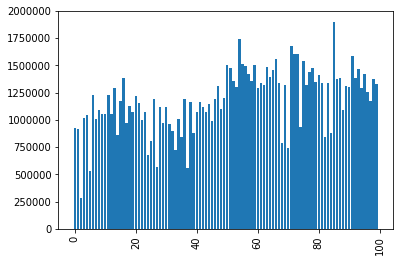

In [28]:
# Graph Data
#plt.bar(np.arange(0,len(df),1),df["Views"], tick_label = df["Date"])
plt.bar(np.arange(0,len(df),1),df["Views"])
plt.xticks(rotation=90)